<a href="https://colab.research.google.com/github/VaidehiJadhav2803/Regression--Credibl/blob/main/Polynomial_and_exponential_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-0c165aac4ae9>:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
<ipython-input-2-0c165aac4ae9>:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exp_func, X.flatten(), y, maxfev=10000)
<ipython-input-2-0c165aac4ae9>:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
<ipython-input-2-0c165aac4ae9>:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exp_func, X.flatten(), y, maxfev=10000)
<ipython-input-2-0c165aac4ae9>:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
<ipython-input-2-0c165aac4ae9>:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exp_func, X.flatten(), y, maxfev=10000)
<ipython-input-2-0c165aac4ae9>:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
<ipython-input-2-0c165aac4ae9>:38: OptimizeWarning: Covariance

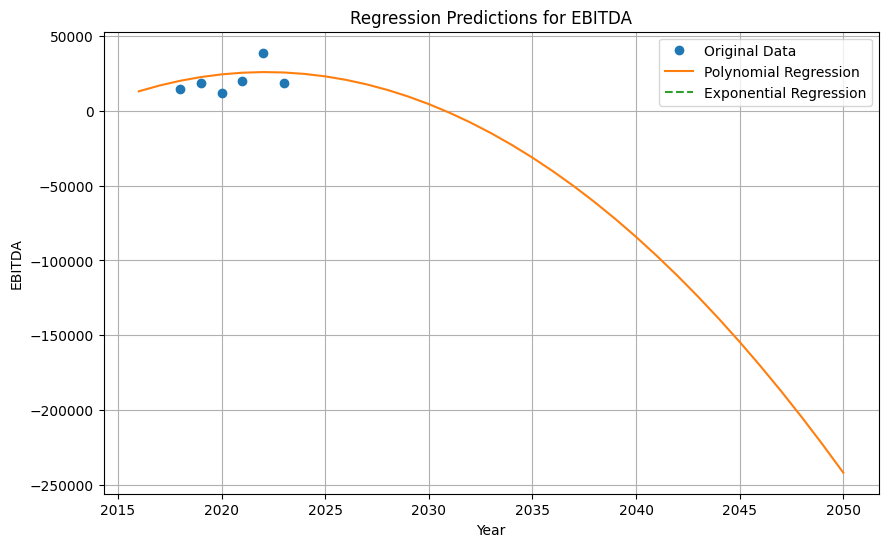

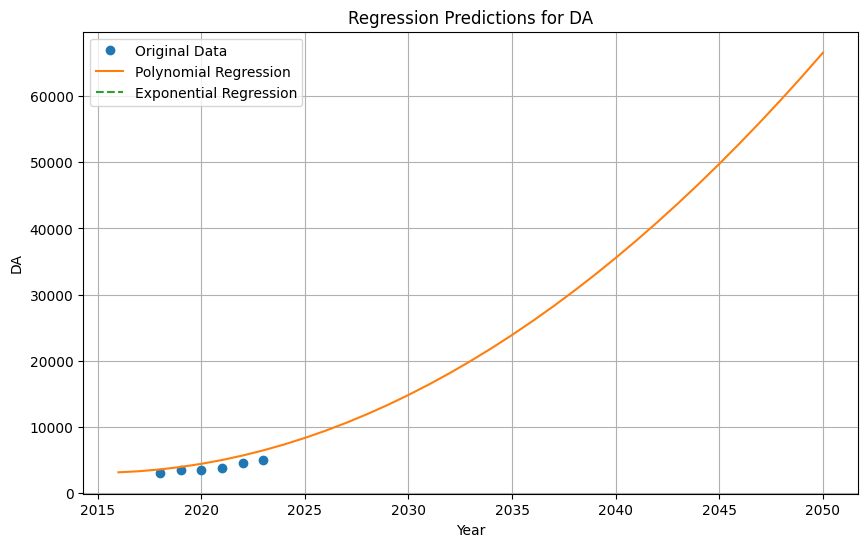

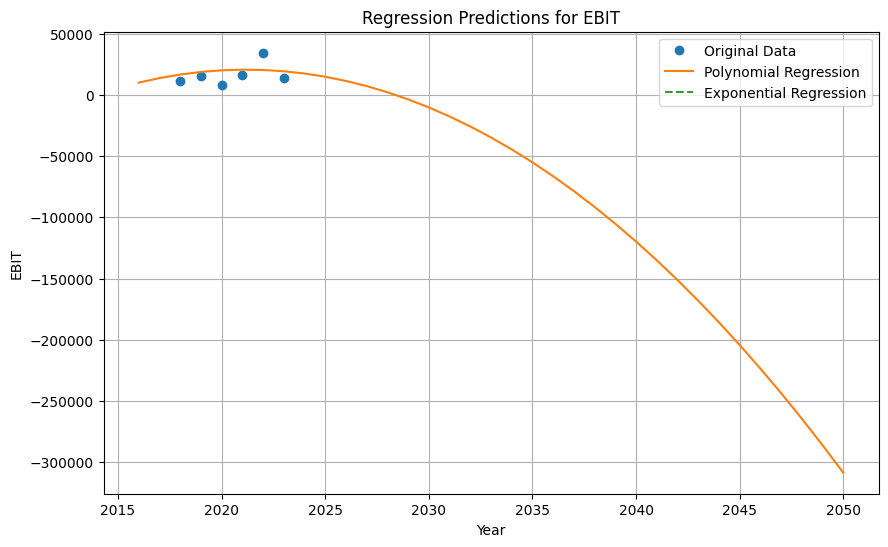

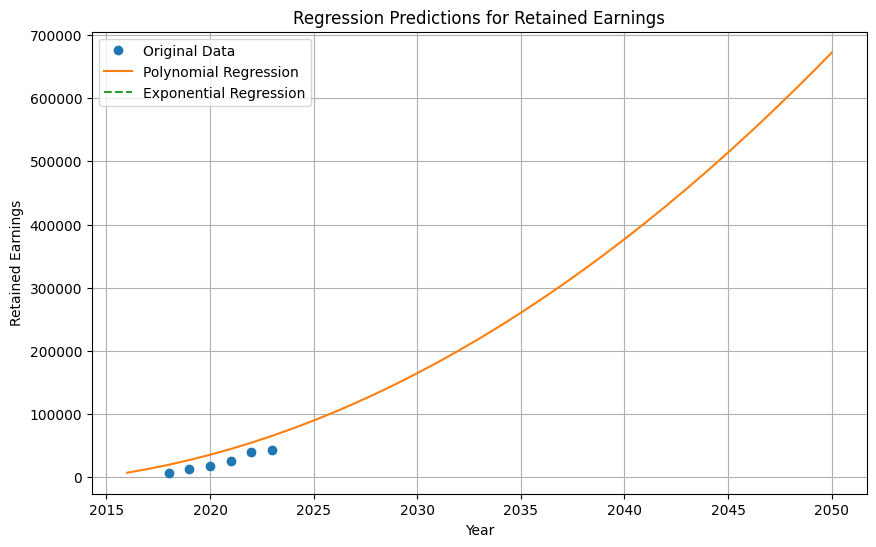

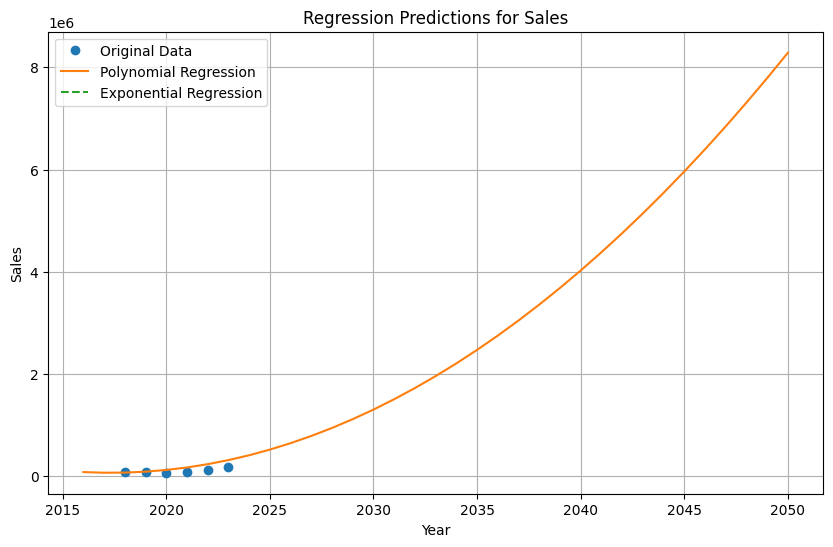

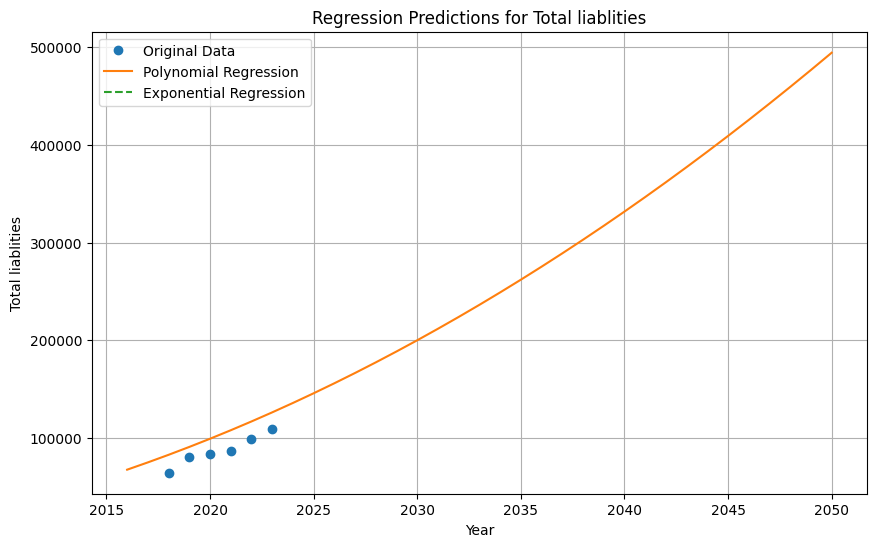

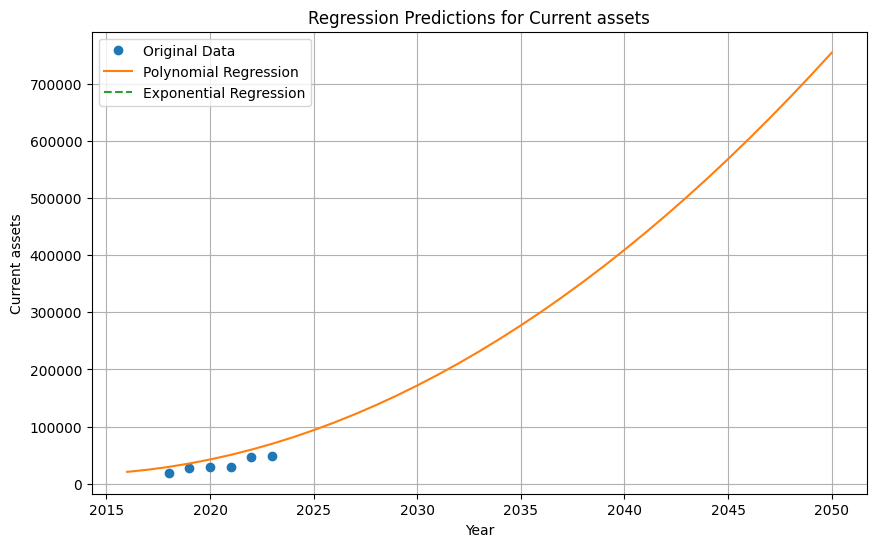

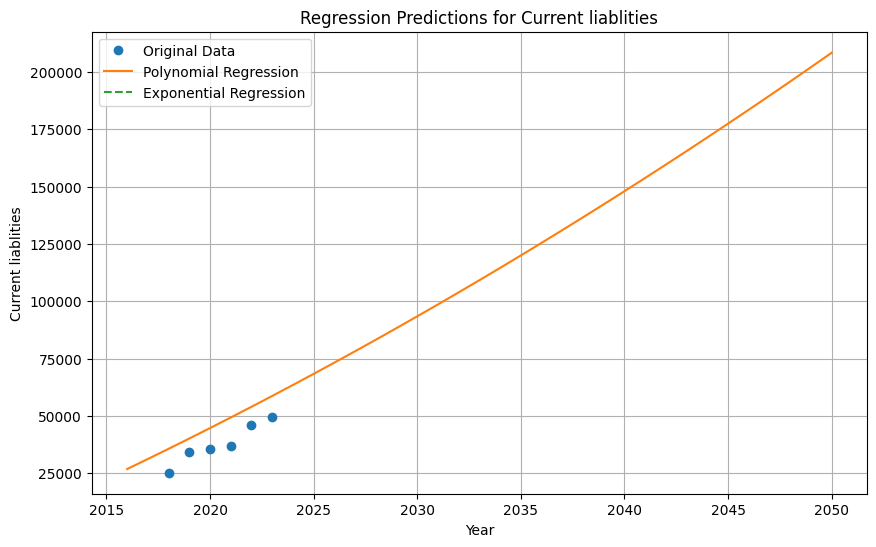

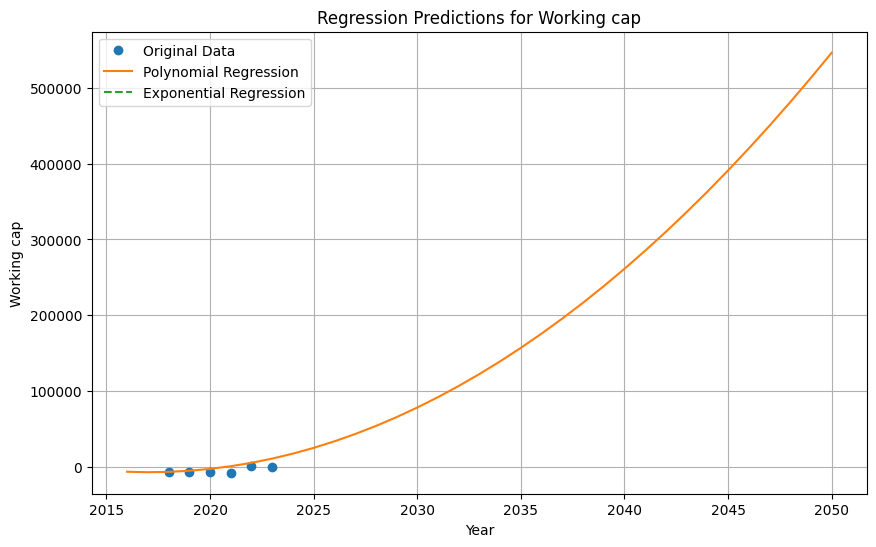

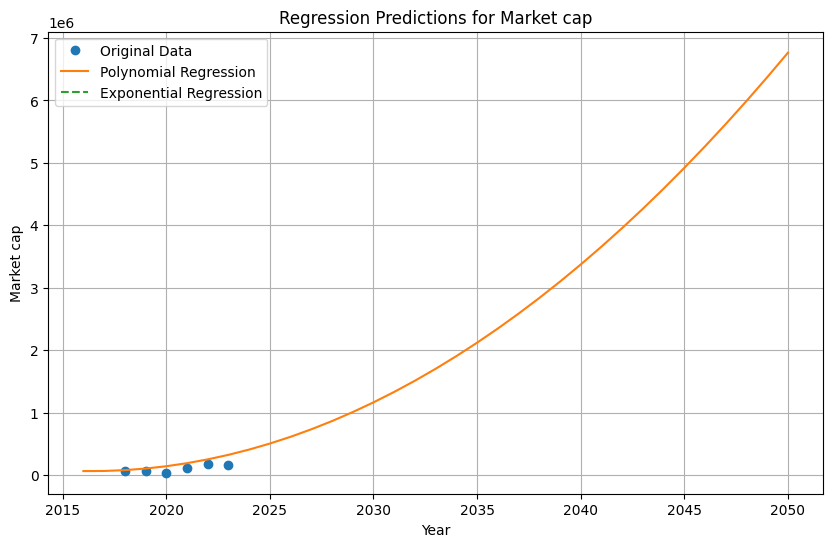

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


file_path = '/content/roa_poly regression.xlsx'
data = pd.read_excel(file_path)

data = data.dropna(subset=['Years'])

variables = data.columns[1:]

years = np.arange(data['Years'].min(), 2051)

predictions_poly = pd.DataFrame({'Years': years})
predictions_exp = pd.DataFrame({'Years': years})

for variable in variables:
    X = data[['Years']].values
    y = data[variable].dropna().values
    X = X[:len(y)]

    #Polynomial regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)
    poly_predictions = poly_regressor.predict(poly.fit_transform(years.reshape(-1, 1)))
    predictions_poly[variable] = poly_predictions

    # Exponential Regression
    def exp_func(x, a, b, c):
        return a * np.exp(b * x) + c

    popt, _ = curve_fit(exp_func, X.flatten(), y, maxfev=10000)
    exp_predictions = exp_func(years, *popt)
    predictions_exp[variable] = exp_predictions

# Save the predictions to Excel files
predictions_poly.to_excel('predictions_polynomial_regression.xlsx', index=False)
predictions_exp.to_excel('predictions_exponential_regression.xlsx', index=False)

# Plot the results for each variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Years'], data[variable], 'o', label='Original Data')
    plt.plot(predictions_poly['Years'], predictions_poly[variable], '-', label='Polynomial Regression')
    plt.plot(predictions_exp['Years'], predictions_exp[variable], '--', label='Exponential Regression')
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.title(f'Regression Predictions for {variable}')
    plt.legend()
    plt.grid(True)
    plt.show()
